# Neural & Behavioral Modeling - Week 1 (Exercises)
by Chi-Lin Yu (r05227101@ntu.edu.tw; psychilinyu@gmail.com)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *
from itertools import compress
random.seed(1)  

## 1 Party Simulation (5 points)
This is a model of a cocktail party. The men and women at the party form groups. A party-goer becomes uncomfortable and switches groups if their current group has too many members of the opposite sex. What types of group result?

### 1.1 Insert your codes to complete the simulation (2 points)

In [ ]:
# Model parameters:
Ngroups=10
Npeople=100  
Tolerance=.40 # tolerable propotion of the opposite sex

# Supporting functions:
class Person:
    def __init__(self, Ngroups):
        self.sex = random.randint(2) # 0=woman; 1=man
        self.Ngroups=Ngroups
        self.group = random.randint(Ngroups) # staying in which group?
        
    def leave(self):
        options=delete(arange(self.Ngroups),self.group) # except the current group
        self.group = int(random.choice(options,1)) # choosing a new group
    
def party_stats(people): # calculate the number of men & women in each group
    Npeople=len(people)    
    sexes=[people[i].sex for i in range(Npeople)]
    groups=[people[i].group for i in range(Npeople)]
    counts=zeros((max(groups)+1,max(sexes)+1))
    proportions=counts.copy()
    for p in range(Npeople):
        counts[groups[p],sexes[p]]+=1
    men_plus_women=sum(counts,1) # number of men and women in each group
    men_plus_women[men_plus_women==0]=inf # to avoid "dividing by zeros later
    proportions[:,0]=counts[:,0]/men_plus_women # proportion of women in each group
    proportions[:,1]=counts[:,1]/men_plus_women # proportion of men in each group
    return counts, proportions # size=group*sex

def plot_party(counts):
    x=arange(len(counts))+1 # number of groups
    clf() # clear previous figure
    bar(x, counts[:,0], color = 'r') # women
    bar(x, counts[:,1], color = 'b', bottom = counts[:,0]) # men on top of women in the plot
    display(gcf()); clear_output(wait=True) # to allow dynamic plots

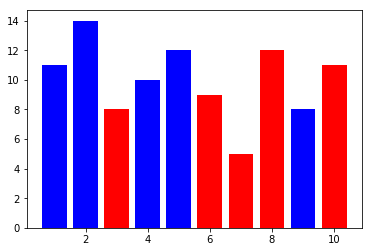

In [ ]:
# Initialization:
people = [Person(Ngroups) for i in range(Npeople)] # assign each person to a group
Nhappy=0 # Number of happy people

# Simulation:
while(Nhappy<Npeople): # Simulation stops when everyone is happy
    Nhappy=0 # recounting after a new move
    for i in range(Npeople): 
        counts, proportions = party_stats(people)
        temp = list(range(Ngroups))
        fil0 = list(proportions[:,0] > Tolerance)
        fil1 = list(proportions[:,1] > Tolerance)
        if people[i].group in list(compress(temp, fil0)):
            if people[i].sex == 1: 
                people[i].leave()
        elif people[i].group in list(compress(temp, fil1)):
            if people[i].sex == 0:
                people[i].leave()
        else:
            Nhappy=Nhappy+1
        # Plot new results:
        counts, proportions=party_stats(people) # size=group*sex
        plot_party(counts)    

### 1.2 Modify the three model parameters & discuss how each affects convergence of the simulation (2 points)

### 1.3 Discuss why the simulaiton leads to group polarization (1 point)